2장 인공 신경망 모델

In [ ]:
# 예제 2.1 뉴런의 출력(텐서플로) 바이어스가 없는 경우

import tensorflow as tf

# 계단 함수 정의
def step_function(net):
    if net >= T:   # 임계치 T
        return 1
    else:
        return 0

# 뉴런 정의
def neuron(x, w):
    net = tf.reduce_sum(x * w)   # 입력 가중합
    return step_function(net)

T = 3   # 임계치 3

x = tf.constant([1., 2., 3.])      # 입력
w = tf.constant([1., 0.3, 0.5])    # 가중치

y = neuron(x, w)

print(f"net: {tf.reduce_sum(x * w):.2f}")
print(f"y: {y}")

net: 3.10
y: 1


In [ ]:
# 예제 2.2 뉴런의 출력(파이토치) 바이어스가 있는 경우

import torch

# 계단 함수 정의
def step_function(net):
    if net >= T:   # 임계치 T
        return 1
    else:
        return 0

# 뉴런 정의
def neuron(x, w, b):
    net = torch.sum(x * w) + b   # 가중합
    return step_function(net)

T = 3   # 임계치 3

x = torch.tensor([1., 2., 3.])    # 입력
w = torch.tensor([1, 0.3, 0.5])   # 가중치
b = torch.tensor(-0.5)            # 바이어스

y = neuron(x, w, b)

print(f"net: {torch.sum(x * w) + b:.2f}")
print(f"y: {y}")

net: 2.60
y: 0


In [ ]:
# 예제 2.3 선형 뉴런(파이썬) 가중치 초기화
import numpy as np
np.random.seed(7)

# 선형 뉴런 정의
def linear_neuron(x, w, b):
    net = np.dot(x, w) + b
    return net

x = np.array([1, 2, 3])
w = np.random.randn(3)   # 가중치 랜덤 초기화
b = np.random.randn()    # 바이어스 랜덤 초기화

y = linear_neuron(x, w, b)

print(f"input: {x} \nweights: {w.round(2)} \nbias: {b:.2f}")
print(f"net: {np.dot(x, w) + b:.2f}")
print(f"y: {y:.2f}")

input: [1 2 3] 
weights: [ 1.69 -0.47  0.03] 
bias: 0.41
net: 1.26
y: 1.26


In [ ]:
# 예제 2.5 단층 신경망을 이용한 분류

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 모델 생성
model = Sequential([
    Flatten(input_shape=(3, 3)),    # 2차원 패턴을 1차원 벡터로 변환
    Dense(2, name='Output_Layer')   # 출력층 뉴런 2개
])

In [ ]:
# 모델 구조 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 Output_Layer (Dense)        (None, 2)                 20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 예제 2.6 3계층 신경망을 이용한 분류

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# 모델 생성
model = Sequential([
    Flatten(input_shape=(9, 7)),
    Dense(2, name='Hidden_Layer'),   # 은닉층 뉴런 2개
    Dense(3, name='Output_Layer')    # 출력층 뉴런 3개
])


In [ ]:
# 모델 생성(add 메소드 이용)
model = Sequential()
model.add(Flatten(input_shape=(9, 7)))
model.add(Dense(2, name='Hidden_Layer'))
model.add(Dense(3, name='Output_Layer'))

# 모델 구조 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 63)                0         
                                                                 
 Hidden_Layer (Dense)        (None, 2)                 128       
                                                                 
 Output_Layer (Dense)        (None, 3)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


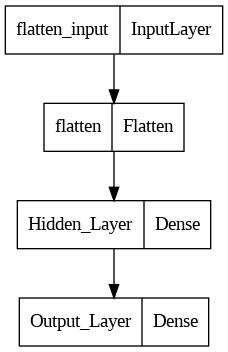

In [ ]:
# 모델 구조
tf.keras.utils.plot_model(model)

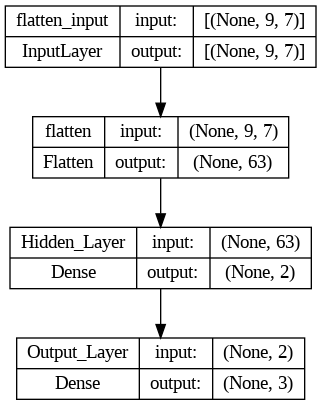

In [ ]:
# 모델 구조
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 예제 2.8 단층 신경망 학습(AND 연산)(파이썬)

# 셋업
import numpy as np
np.random.seed(77)

# 계단 함수 정의
def step_function(net):
    if net >= T:   # 임계치 T
        return 1
    else:
        return 0

# 뉴런 정의
def neuron(x, w, b):
    net = np.dot(x, w) + b   # 입력 가중합
    return step_function(net)

T = 0   # 임계치 0

# 학습 데이터 준비
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 입력 데이터
y_train = np.array([[0], [0], [0], [1]])               # 목표치(정답)

# 가중치 초기화
w = np.random.randn(2)   # 정규 분포(평균 0, 표준편차 1)
b = np.random.randn(1)

print(f"initial weights: {w.round(2)}")
print(f"initial bias: {b.round(2)}")

initial weights: [0.22 0.66]
initial bias: [-0.58]


In [ ]:
# 초기 가중치의 결과 확인(AND 동작 안됨)
x_init_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_init_test = np.array([[0], [0], [0], [1]])

for i in range(4):
    initial_predict = neuron(x_init_test[i], w, b)

    print(f"x: {x_init_test[i]}  y: {y_init_test[i]}  predict: {initial_predict}")

x: [0 0]  y: [0]  predict: 0
x: [0 1]  y: [0]  predict: 1
x: [1 0]  y: [0]  predict: 0
x: [1 1]  y: [1]  predict: 1


In [ ]:
# 오차를 이용한 신경망 학습
epochs = 10            # 10회 반복
learning_rate = 0.01   # 학습률 0.01

for i in range(epochs):
    loss = 0

    for j in range(4):
        output = neuron(x_train[j], w, b)         # 출력 구함
        error = y_train[j] - output               # 오차(목표치 - 출력) 계산
        w += learning_rate * error * x_train[j]   # 가중치 변경
        b += learning_rate * error                # 바이어스 변경
        loss += error

    print(f"Epoch {i+1} \t Error: {loss}")   # 에포크마다 오차 출력

print(f"\nfinal weights: {w.round(2)}")
print(f"final bias: {b.round(2)}")

Epoch 1 	 Error: [-1]
Epoch 2 	 Error: [-1]
Epoch 3 	 Error: [-1]
Epoch 4 	 Error: [-1]
Epoch 5 	 Error: [-1]
Epoch 6 	 Error: [0]
Epoch 7 	 Error: [0]
Epoch 8 	 Error: [0]
Epoch 9 	 Error: [0]
Epoch 10 	 Error: [0]

final weights: [0.22 0.61]
final bias: [-0.63]


In [ ]:
# 검증(예측)
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 테스트 데이터
y_test = np.array([[0], [0], [0], [1]])               # 테스트 정답

for i in range(4):
    predict = neuron(x_test[i], w, b)   # 예측

    print(f"x: {x_test[i]}  y: {y_test[i]}  predict: {predict}")

x: [0 0]  y: [0]  predict: 0
x: [0 1]  y: [0]  predict: 0
x: [1 0]  y: [0]  predict: 0
x: [1 1]  y: [1]  predict: 1


In [ ]:
# 예제 2.9 단극성 계단 함수

import numpy as np

# 단극성 계단 함수 정의
def unipolar_step(net):
    if net >= 2:   # 임계치 2
        return 1
    else:
        return 0

x = np.array([1, 2])
w = np.array([-1, 1])

net = np.dot(x, w)       # 입력 가중합
y = unipolar_step(net)   # 출력

print(f"net: {net} \n y: {y}")

net: 1 
 y: 0


In [ ]:
# 예제 2.10 sign 함수(양극성 계단 함수)

import numpy as np

# sign 함수 정의
def sign(net):
    if net > 0:   # 임계치 0
        return 1
    elif net == 0:
        return 0
    else:
        return -1

x = np.array([1, 2])
w = np.array([-1, 1])

net = np.dot(x, w)   # 입력 가중합
y = sign(net)        # 출력

print(f"net: {net} \n y: {y}")

net: 1 
 y: 1


In [ ]:
# 예제 2.11 ReLU 함수

import numpy as np

# ReLU 함수 정의
def relu(net):
    if net >= 0:
        return net
    else:
        return 0

x = np.array([1, -2])
w = np.array([-1, 1])

net = np.dot(x, w)   # 입력 가중합
y = relu(net)        # 출력

print(f"net: {net} \n y: {y}")

net: -3 
 y: 0


In [ ]:
# 예제 2.12(a) Leaky ReLU 함수

# LeakyReLU 함수 정의
def leaky_relu(net):
    if net >= 0:
        return net
    else:
        return 0.01 * net

print(f"net: -2 \t y: {leaky_relu(-2)}")
print(f"net: -5 \t y: {leaky_relu(-5)}")

net: -2 	 y: -0.02
net: -5 	 y: -0.05


In [ ]:
# 예제 2.12(b) ELU 함수 값

import numpy as np

# ELU 함수 정의
def elu(net):
    if net >= 0:
        return net
    else:
        return np.exp(net) - 1

print(f"net: -2 \t y: {elu(-2):.2f}")
print(f"net: -5 \t y: {elu(-5):.2f}")

net: -2 	 y: -0.86
net: -5 	 y: -0.99


In [ ]:
# 예제 2.13 sigmoid 함수

import numpy as np

# sigmoid 함수 정의
def sigmoid(net):
    return  1 / (1 + np.exp(-net))

x = np.array([1, 2])
w = np.array([-1, 1])

net = np.dot(x, w)   # 입력 가중합
y = sigmoid(net)     # 출력

print(f"net: {net} \n y: {y:.2f}")

net: 1 
 y: 0.73


In [ ]:
# 예제 2.14 tanh 함수

import numpy as np

# tanh 함수 정의
def tanh(net):
    return (np.exp(net) - np.exp(-net)) / (np.exp(net) + np.exp(-net))

x = np.array([1, 2])
w = np.array([-1, 1])

net = np.dot(x, w)   # 입력 가중합
y = tanh(net)        # 출력

print(f"net: {net} \n y: {y:.2f}")

net: 1 
 y: 0.76


In [ ]:
# 예제 2.15 softmax 함수

# softmax

import numpy as np

# softmax 함수 정의
def softmax(net):
    return np.exp(net) / np.sum(np.exp(net))

# 시그모이드 함수 정의
def sigmoid(net):
    return  1 / (1 + np.exp(-net))

x = np.array([[1, 1, 0]])
w = np.array([[1, 2, 3], [3, 2, 1]])

net = np.matmul(x, w.T).reshape(-1)   # 입력 가중합

y1 = softmax(net).round(2)   # softmax 함수 출력
y2 = sigmoid(net).round(2)   # sigmoid 함수 출력

print(f"net: {net}")
print(f"y_softmax: {y1} \n sum of y_softmax: {np.sum(y1)}")
print(f"y_sigmoid: {y2} \n sum of y_sigmoid: {np.sum(y2).round(2)}")

net: [3 5]
y_softmax: [0.12 0.88] 
 sum of y_softmax: 1.0
y_sigmoid: [0.95 0.99] 
 sum of y_sigmoid: 1.94
